In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

np.random.seed(42)

В качестве данных будем использовать информацию о количестве заболеваний/смертей в US:

In [5]:
df = pd.read_csv('data/countries-aggregated_csv.csv',parse_dates=True,index_col=0)
df = df[df['Country'] == 'US'][['Confirmed', 'Deaths']]
df.tail()

,Confirmed,Deaths
Date,,
2021-09-27,43116877,690435
2021-09-28,43226482,692592
2021-09-29,43349749,695123
2021-09-30,43460343,697851
2021-10-01,43618627,700285


Выбросим первые 3 месяца данных и перейдем к процентным изменениям показателей относительно прошлого дня:

In [6]:
df = df[90:]
df = df.pct_change().dropna()
df = df * 100.0
df

,Confirmed,Deaths
Date,,
2020-04-22,3.522660,5.188620
2020-04-23,3.892299,4.856886
2020-04-24,3.643498,4.143047
2020-04-25,3.302244,3.148973
2020-04-26,2.796281,2.502125
...,...,...
2021-09-27,0.430953,0.347944
2021-09-28,0.254204,0.312412
2021-09-29,0.285165,0.365439


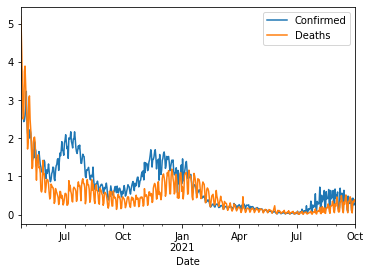

In [7]:
df['Confirmed'].plot()
df['Deaths'].plot()

plt.legend(loc='upper right')
plt.show()

10. Статистическая проверка гипотез
- о типе закона распределения
- об однородности двух или нескольких выборок
- о численных значениях параметров генеральной совокупности
11. Критерий отношения правдоподобия для простой гипотезы
12. Критерий отношения правдоподобия для сложной гипотезы
13. Последовательный критерий отношения правдоподобия Вальда
14. Критерии согласия Колмогорова, Колмогорова-Смирнова, хи-квадрат Пирсона (для простой и сложной гипотезы)
15. Критерии однородности
16. Проверка гипотез о числовых значениях параметров распределения

# Статистическая проверка гипотез

о типе закона распределения (распределение не является нормальным):

In [11]:
k2, p = ss.normaltest(df['Confirmed'])
alpha = 1e-2
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


об однородности двух выборок:

In [13]:
from sklearn.model_selection import train_test_split

x_train ,x_test = train_test_split(df['Confirmed'],test_size=0.5)  

p = ss.kstest(x_train, x_test)[1]

if p >= 0.05:
    print('Distributions are identical')
else :
    print('Distributions are not identical')

Distributions are identical


о численных значениях параметров генеральной совокупности

# Критерий отношения правдоподобия для простой гипотезы